<a href="https://colab.research.google.com/github/oldistic/fishify/blob/machine-learning/fishify_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fishify

## Load Data

In [4]:
import pathlib

from google.colab import drive
drive.mount('/content/drive')

data_dir = "drive/MyDrive/capstone_project"
data_dir = pathlib.Path(data_dir)


Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/capstone_project/fishify/datasets/fish
!ls

/content/drive/MyDrive/capstone_project/fishify/datasets/fish
Training  Validation


# Data Processing


In [2]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop

In [6]:
file_path ="/content/drive/MyDrive/capstone_project/fishify/datasets/fish/"
class_name=sorted(os.listdir(file_path+'Training'))

kembung_path = os.path.join(file_path+'Training/ikan_kembung')
mujair_path = os.path.join(file_path+'Training/ikan_mujair')
bawal_path = os.path.join(file_path+'Training/ikan_bawal')
belut_path = os.path.join(file_path+'Training/ikan_belut')
gurame_path = os.path.join(file_path+'Training/ikan_gurame')
kakap_path = os.path.join(file_path+'Training/ikan_kakap')
lele_path = os.path.join(file_path+'Training/ikan_lele')
udang_path = os.path.join(file_path+'Training/udang')
mas_path = os.path.join(file_path+'Training/ikan_mas')
nila_path = os.path.join(file_path+'Training/ikan_nila')
tenggiri_path = os.path.join(file_path+'Training/ikan_tenggiri')
tongkol_path = os.path.join(file_path+'Training/ikan_tongkol')
tuna_path = os.path.join(file_path+'Training/ikan_tuna')

kembung_files=os.listdir(kembung_path)
mujair_files=os.listdir(mujair_path)
bawal_files=os.listdir(bawal_path)
belut_files=os.listdir(belut_path)
gurame_files=os.listdir(gurame_path)
kakap_files=os.listdir(kakap_path)
lele_files=os.listdir(lele_path)
udang_files=os.listdir(udang_path)
mas_files=os.listdir(mas_path)
nila_files=os.listdir(nila_path)
tenggiri_files=os.listdir(tenggiri_path)
tongkol_files=os.listdir(tongkol_path)
tuna_files=os.listdir(tuna_path)

print(class_name)

print('\n=========================================================\n')

print('total training ikan kembung', len(os.listdir(kembung_path)))
print('total training ikan mujair', len(os.listdir(mujair_path)))
print('total training ikan bawal', len(os.listdir(bawal_path)))
print('total training ikan belut', len(os.listdir(belut_path)))
print('total training ikan gurame', len(os.listdir(gurame_path)))
print('total training ikan kakap', len(os.listdir(kakap_path)))
print('total training ikan lele', len(os.listdir(lele_path)))
print('total training udang', len(os.listdir(udang_path)))
print('total training ikan mas', len(os.listdir(mas_path)))
print('total training ikan nila', len(os.listdir(nila_path)))
print('total training ikan tenggiri', len(os.listdir(tenggiri_path)))
print('total training ikan tongkol', len(os.listdir(tongkol_path)))
print('total training ikan tuna', len(os.listdir(tuna_path)))

print('\n=========================================================\n')

print(kembung_files[:5])
print(mujair_files[:5])
print(bawal_files[:5])
print(belut_files[:5])
print(gurame_files[:5])
print(kakap_files[:5])
print(lele_files[:5])
print(udang_files[:5])
print(mas_files[:5])
print(nila_files[:5])
print(tenggiri_files[:5])
print(tongkol_files[:5])
print(tuna_files[:5])

['ikan_bawal', 'ikan_belut', 'ikan_gurame', 'ikan_kakap', 'ikan_kembung', 'ikan_lele', 'ikan_mas', 'ikan_mujair', 'ikan_nila', 'ikan_tenggiri', 'ikan_tongkol', 'ikan_tuna', 'udang']


total training ikan kembung 100
total training ikan mujair 100
total training ikan bawal 100
total training ikan belut 100
total training ikan gurame 100
total training ikan kakap 100
total training ikan lele 100
total training udang 91
total training ikan mas 100
total training ikan nila 100
total training ikan tenggiri 100
total training ikan tongkol 100
total training ikan tuna 100


['kembung_2.jpg', 'kembung_99.jpg', 'kembung_98.jpg', 'kembung_97.jpg', 'kembung_96.jpg']
['mujair_96.png', 'mujair_97.png', 'mujair_99.png', 'mujair_88.png', 'mujari_98.png']
['bawal_53.jpg', 'bawal_65.jpg', 'bawal_77.jpg', 'bawal_90.jpg', 'bawal_54.jpg']
['belut_93.jpg', 'belut_86.jpg', 'belut_82.jpg', 'belut_88.jpg', 'belut_85.jpg']
['gurame_94.jpg', 'gurame_40.jpg', 'gurame_86.jpg', 'gurame_18.jpg', 'gurame_37.jpg']
['

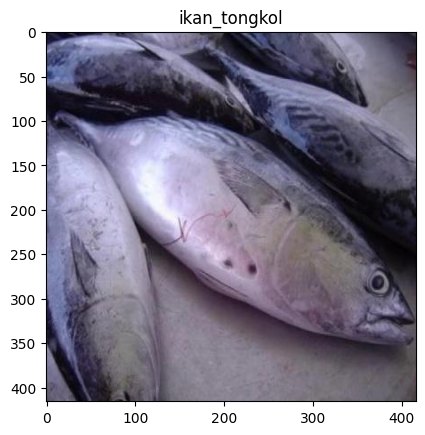

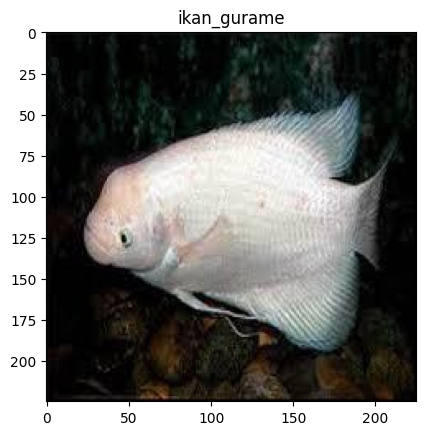

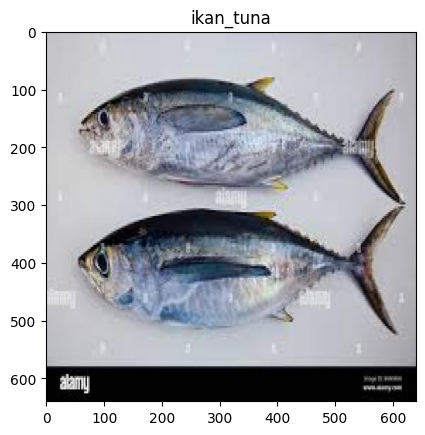

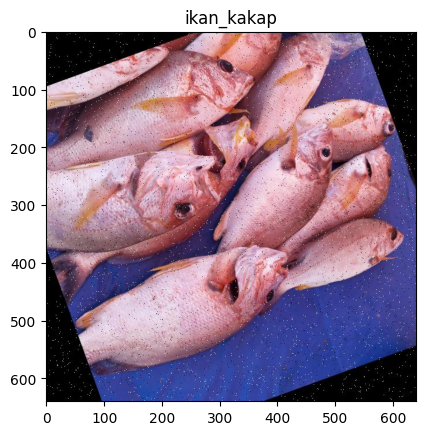

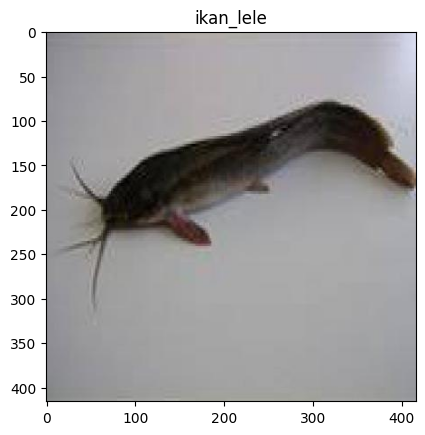

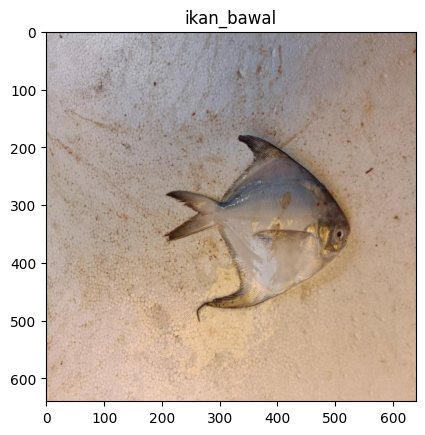

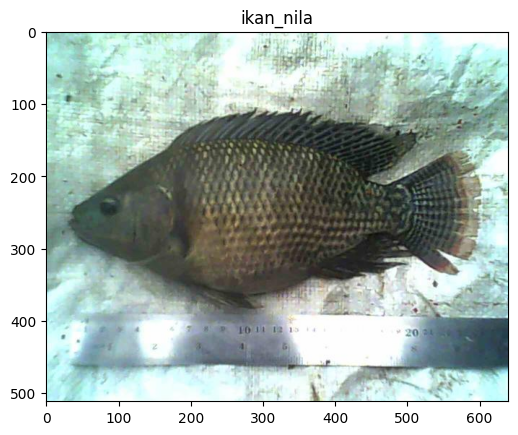

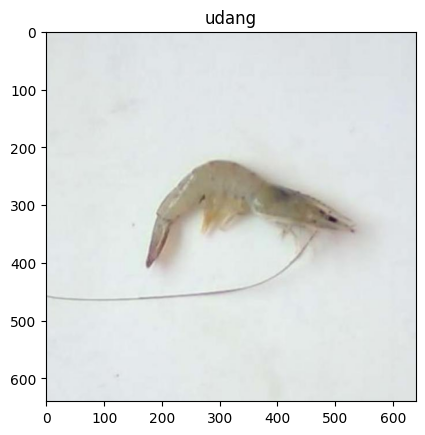

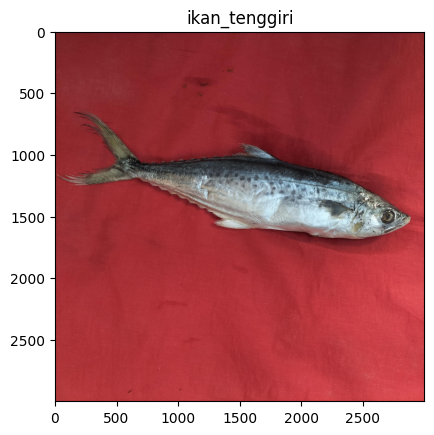

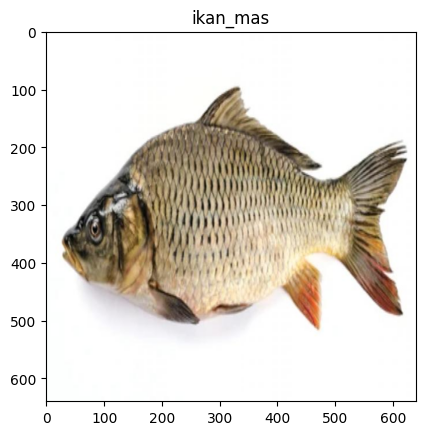

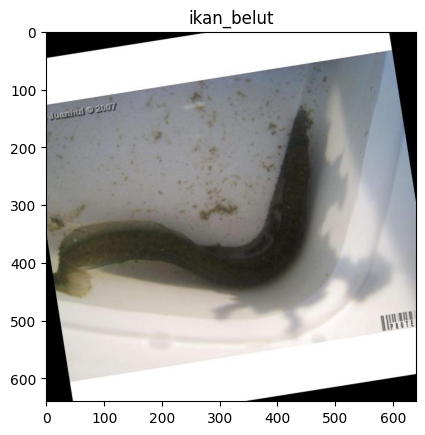

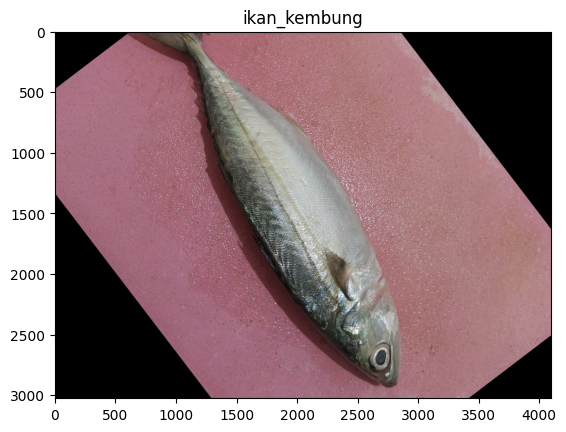

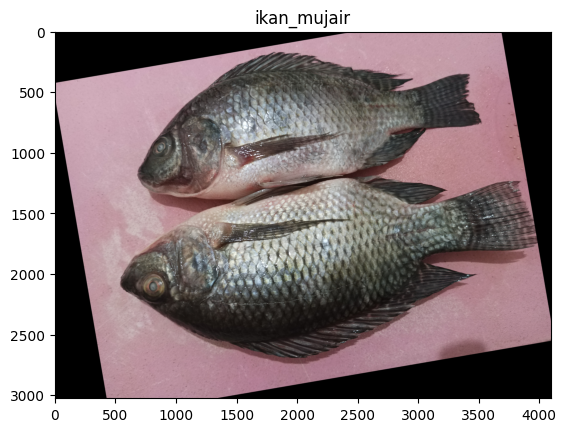

In [7]:
class_dirs = [d for d in os.listdir(file_path+'Training') if os.path.isdir(os.path.join(file_path+'Training', d))]

for class_dir in class_dirs:
    class_dir_path = os.path.join(file_path+'Training', class_dir)
    image_file = os.listdir(class_dir_path)[0]
    image_path = os.path.join(class_dir_path, image_file)

    # Muat dan tampilkan gambar
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(class_dir)
    plt.show()

# Training and Validation Generators

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True)


val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    file_path+'Training',
    batch_size=64,
    class_mode='categorical',
    target_size=(224, 224)
    )

validation_generator = val_datagen.flow_from_directory(
    file_path+'Validation',
    batch_size=64,
    class_mode='categorical',
    target_size=(224, 224)
    )

Found 1291 images belonging to 13 classes.
Found 258 images belonging to 13 classes.


# Transfer Learning

In [9]:
from tensorflow.keras.applications import InceptionV3

base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(224,224,3))

base_model.trainable = False

87910968/87910968 [==============================] - 1s 0us/step


# Build Model

In [10]:
# Build the CNN model
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(13, activation='softmax')
    ])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # You can adjust the number of epochs based on your needs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Display the model summary
model.summary()


Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 2.7153 - accuracy: 0.3798 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 [==============================] - 665s 33s/step - loss: 2.7153 - accuracy: 0.3798 - val_loss: 1.7090 - val_accuracy: 0.4688
Epoch 2/10
20/20 [==============================] - 194s 10s/step - loss: 1.0811 - accuracy: 0.6789 - val_loss: 1.5136 - val_accuracy: 0.4844
Epoch 3/10
20/20 [==============================] - 235s 12s/step - loss: 0.7769 - accuracy: 0.7685 - val_loss: 3.0119 - val_accuracy: 0.2734
Epoch 4/10
20/20 [==============================] - 193s 10s/step - loss: 0.6339 - accuracy: 0.8068 - val_loss: 2.4782 - val_accuracy: 0.4219
Epoch 5/10
20/20 [==============================] - 209s 10s/step - loss: 0.4925 - accuracy: 0.8525 - val_loss: 3.2856 - val_accuracy: 0.3281
Epoch 6/10
20/20 [==============================] - 218s 11s/step - loss: 0.4458 - accuracy: 0.8525 - val_loss: 1.8606 - val_accuracy: 0.4688
Epoch 7/10
20/20 [==============================] - 207s 10s/step - loss: 0.4011 - accuracy: 0.8729 - val_loss: 1.8728 - val_accuracy: 0.4648
Epoch 8/10
20/20 

### Plot Training

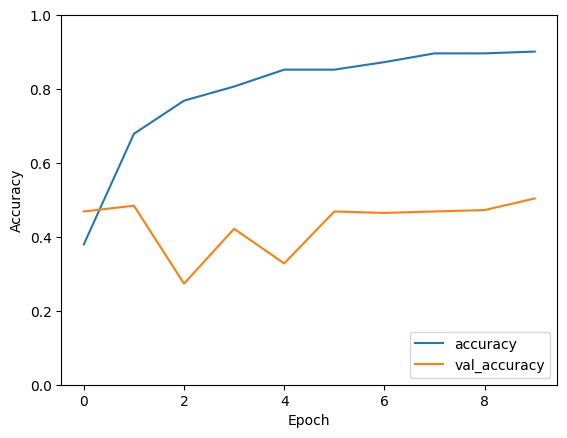

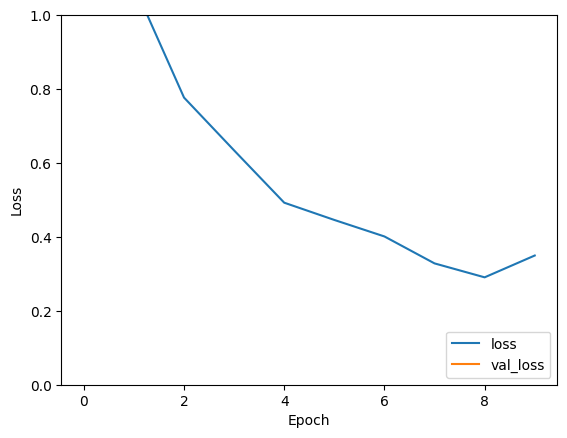

In [11]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


# Saved Model

In [ ]:
# Save the model
model.save("fish_classification_model.h5")